In [1]:
# Import libraries
import pandas as pd
from skimpy import skim
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from collections import  Counter

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
sns.set_theme(style="dark");

In [4]:
# Read post data
posts = pd.read_csv('../data/reddit_CeraVe_posts_20241031_142630.csv')
posts.head()

,post_id,title,selftext,score,subreddit,num_comments,created_utc,has_image,has_video,media_count,permalink
0,1gg3ute,How often do you wear sunscreen/under what con...,This is something that has been on my mind on ...,23,beauty,104,2024-10-31 05:06:41,False,False,0,https://reddit.com/r/beauty/comments/1gg3ute/h...
1,1gfv088,Need Holy Grail Everyday Moisturizer for Combo...,I feel like I have tried every moisturizer und...,1,beauty,0,2024-10-30 22:27:46,False,False,0,https://reddit.com/r/beauty/comments/1gfv088/n...
2,1gfe5fz,Chronically dry lips,I have chronically dry chapped lips. In the su...,17,beauty,43,2024-10-30 07:06:51,False,False,0,https://reddit.com/r/beauty/comments/1gfe5fz/c...
3,1gezs6f,Suggestions on Skincare Routine,"Hi everyone,\n\nThis is my first time really i...",0,beauty,6,2024-10-29 20:08:54,False,False,0,https://reddit.com/r/beauty/comments/1gezs6f/s...
4,1gex8oc,"What are your ""unknown"" skincare tips?",No need to mention the regular stuff like exer...,571,beauty,500,2024-10-29 18:23:32,False,False,0,https://reddit.com/r/beauty/comments/1gex8oc/w...


In [5]:
posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       648 non-null    object
 1   title         648 non-null    object
 2   selftext      612 non-null    object
 3   score         648 non-null    int64 
 4   subreddit     648 non-null    object
 5   num_comments  648 non-null    int64 
 6   created_utc   648 non-null    object
 7   has_image     648 non-null    bool  
 8   has_video     648 non-null    bool  
 9   media_count   648 non-null    int64 
 10  permalink     648 non-null    object
dtypes: bool(2), int64(3), object(6)
memory usage: 47.0+ KB


In [6]:
skim(posts)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 648    │ │ string      │ 6     │                                                          │
│ │ Number of columns │ 11     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %   ┃ mean      ┃ sd       ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ score              │    0 │      0 │     14.35 │     80.4 │    0 │     1 │     2 │     4 │  1581 │    ▇    │  │
│ │ num_comments       │    0 │      0 │     21.22 │    56.06 │    0 │     3 │     6 │    16 │   666 │    ▇    │  │
│ │ media_count        │    0 │      0 │    0.8935 │    1.513 │    0 │     0 │     0 │     1 │    10 │   ▇▂    │  │
│ └────────────────────┴──────┴────────┴───────────┴──────────┴──────┴───────┴───────┴───────┴───────┴─────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ true            ┃ true rate                     ┃ hist                ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ has_image                          │             264 │                          0.41 │       ▇    ▅        │  │
│ │ has_video                          │               0 │                             0 │           ▇         │  │
│ └────────────────────────────────────┴─────────────────┴───────────────────────────────┴─────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ post_id                   │       0 │          0 │                            1 │                      648 │  │
│ │ title                     │       0 │          0 │                          8.6 │                     5564 │  │
│ │ selftext                  │      36 │       5.56 │                          140 │                    89396 │  │
│ │ subreddit                 │       0 │          0 │                            1 │                      648 │  │
│ │ created_utc               │       0 │          0 │                            2 │                     1296 │  │
│ │ permalink                 │       0 │          0 │                            1 │                      648 │  │
│ └───────────────────────────┴─────────┴────────────┴──

In [7]:
# Some cleaning
posts['selftext'] = posts['selftext'].fillna('')
posts = posts.drop('has_video', axis=1)

In [8]:
posts['subreddit'].value_counts()

subreddit
SkincareAddiction     186
Skincare_Addiction    148
SkincareAddicts       125
30PlusSkinCare        125
AsianBeauty            36
beauty                 28
Name: count, dtype: int64

In [6]:
print(posts['created_utc'].min())
print(posts['created_utc'].max())

2024-09-08 18:09:08
2024-10-31 10:00:28


In [ ]:
# Group by subreddit and aggregate count and mean score
subreddit_stats = posts.groupby('subreddit').agg(
    number_of_posts=('score', 'count'),
    avg_score=('score', 'mean'),
    avg_comments=('num_comments', 'mean')
).reset_index().sort_values(by='number_of_posts', ascending=True)

print(subreddit_stats)

There seems to be an inverse relationship between the number of posts and average score and comments. SkincareAddiction has the lowest average score and comments despite having the highest number of posts and beauty has the highest average score and comments whlst have the fewest number of posts.

In [ ]:
correlation = subreddit_stats.number_of_posts.corr(subreddit_stats.avg_score)
print(f'Correlation between number of posts and average scores: {correlation}')

In [ ]:
sns.pairplot(posts, hue='subreddit', palette='Paired');

In [ ]:
# Group by 'has_image' and calculate mean and median scores
image_score_stats = posts.groupby('has_image')['score'].agg(['mean', 'median'])
print("Score Statistics based on Image Availability:\n", image_score_stats)

The higher mean and median scores for posts with images imply a potential correlation between image presence and higher post scores.

In [ ]:
# Group by 'media_count' and calculate mean and median scores
media_score_stats = posts.groupby('media_count')['score'].agg(['mean', 'median','count'])
print("Score Statistics based on Media Count:\n", media_score_stats)

Creating content that includes 2-3 media elements yields the highest levels of engagement. However, exceeding this number may lead to reduced returns.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams_barchart(text, n=2):
    stop_words = set(stopwords.words('english'))
    
    # Tokenize and filter out stopwords
    new = text.str.split().values.tolist()
    corpus = [word for sublist in new for word in sublist if word.lower() not in stop_words]

    # Join the filtered corpus back into documents for CountVectorizer
    corpus = [" ".join(corpus)]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams = _get_top_ngram(corpus, n)
    x, y = map(list, zip(*top_n_bigrams))
    sns.barplot(x=y, y=x, palette='Paired', hue=y)
    plt.show()

In [ ]:
plot_top_ngrams_barchart(posts['selftext'], 3)

In [ ]:
plot_top_ngrams_barchart(posts['title'], n=3)

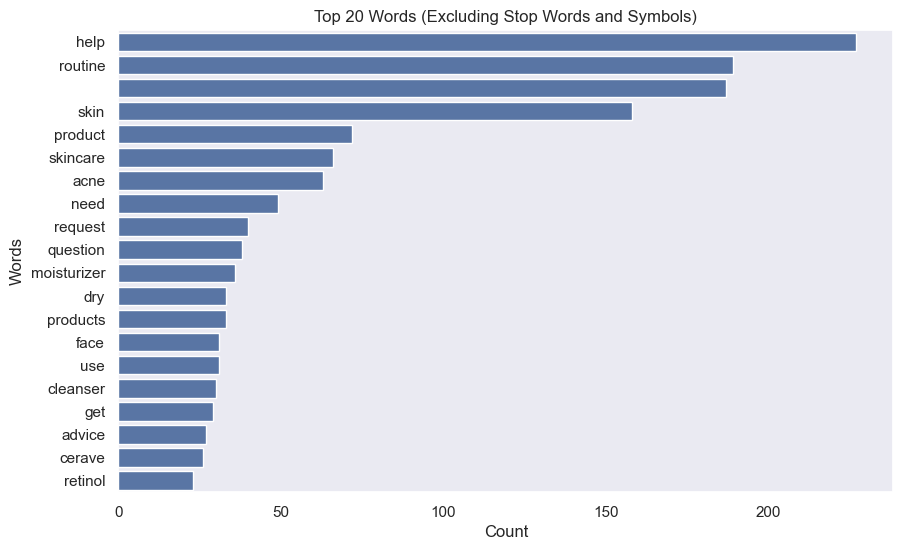

In [ ]:
def plot_top_words(text):
    stop = set(stopwords.words('english'))
    
    # Clean and split text into words, filtering symbols and stop words
    corpus = [
        re.sub(r'[^a-zA-Z]', '', word).lower() 
        for sublist in text.str.split() 
        for word in sublist if word]
    
    counter = Counter(word for word in corpus if word not in stop)
    x, y = zip(*counter.most_common(20))

    plt.figure(figsize=(10, 6))
    sns.barplot(x=y, y=x)
    plt.title('Top 20 Words')
    plt.xlabel('Count')
    plt.ylabel('Words')

plot_top_words(posts['title'])

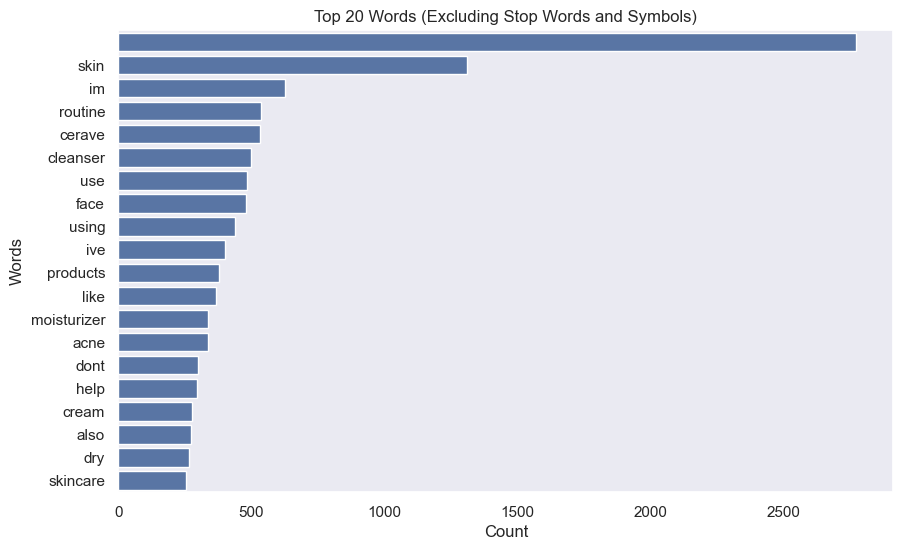

In [146]:
plot_top_words(posts['selftext'])

#### **WordClouds**

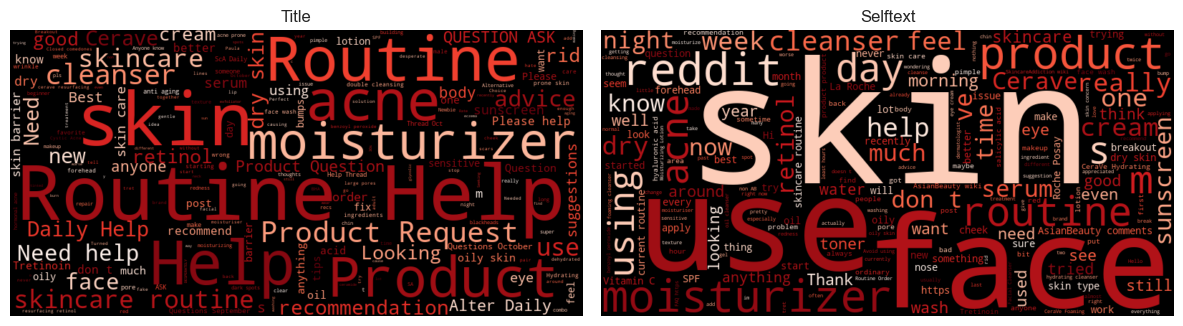

In [121]:
# Generate world clouds 
title = ' '.join(posts['title'])
selftext = ' '.join(posts['selftext'])

wordcloud1 = WordCloud(width=800, height=400, background_color='Black', colormap='Reds').generate(title)
wordcloud2 = WordCloud(width=800, height=400, background_color='Black', colormap='Reds').generate(selftext)

# Plot word clouds
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Title')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.title('Selftext')
plt.axis('off')

plt.tight_layout()

In [ ]:
# Convert 'created_utc' to datetime
posts['created_utc'] = pd.to_datetime(posts['created_utc'])

# Extract time components
posts['hour'] = posts['created_utc'].dt.hour
posts['day_of_week'] = posts['created_utc'].dt.day_name()

In [58]:
# Define day order for plots
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

### **Engagement Insights**

In [69]:
# Calculate metrics
hourly_metrics = posts.groupby(['hour', 'subreddit']).agg({
    'score': 'mean',
    'num_comments': 'mean'
}).round(2).reset_index()

daily_metrics = posts.groupby(['day_of_week', 'subreddit']).agg({
    'score': 'mean',
    'num_comments': 'mean'
}).round(2).reset_index()

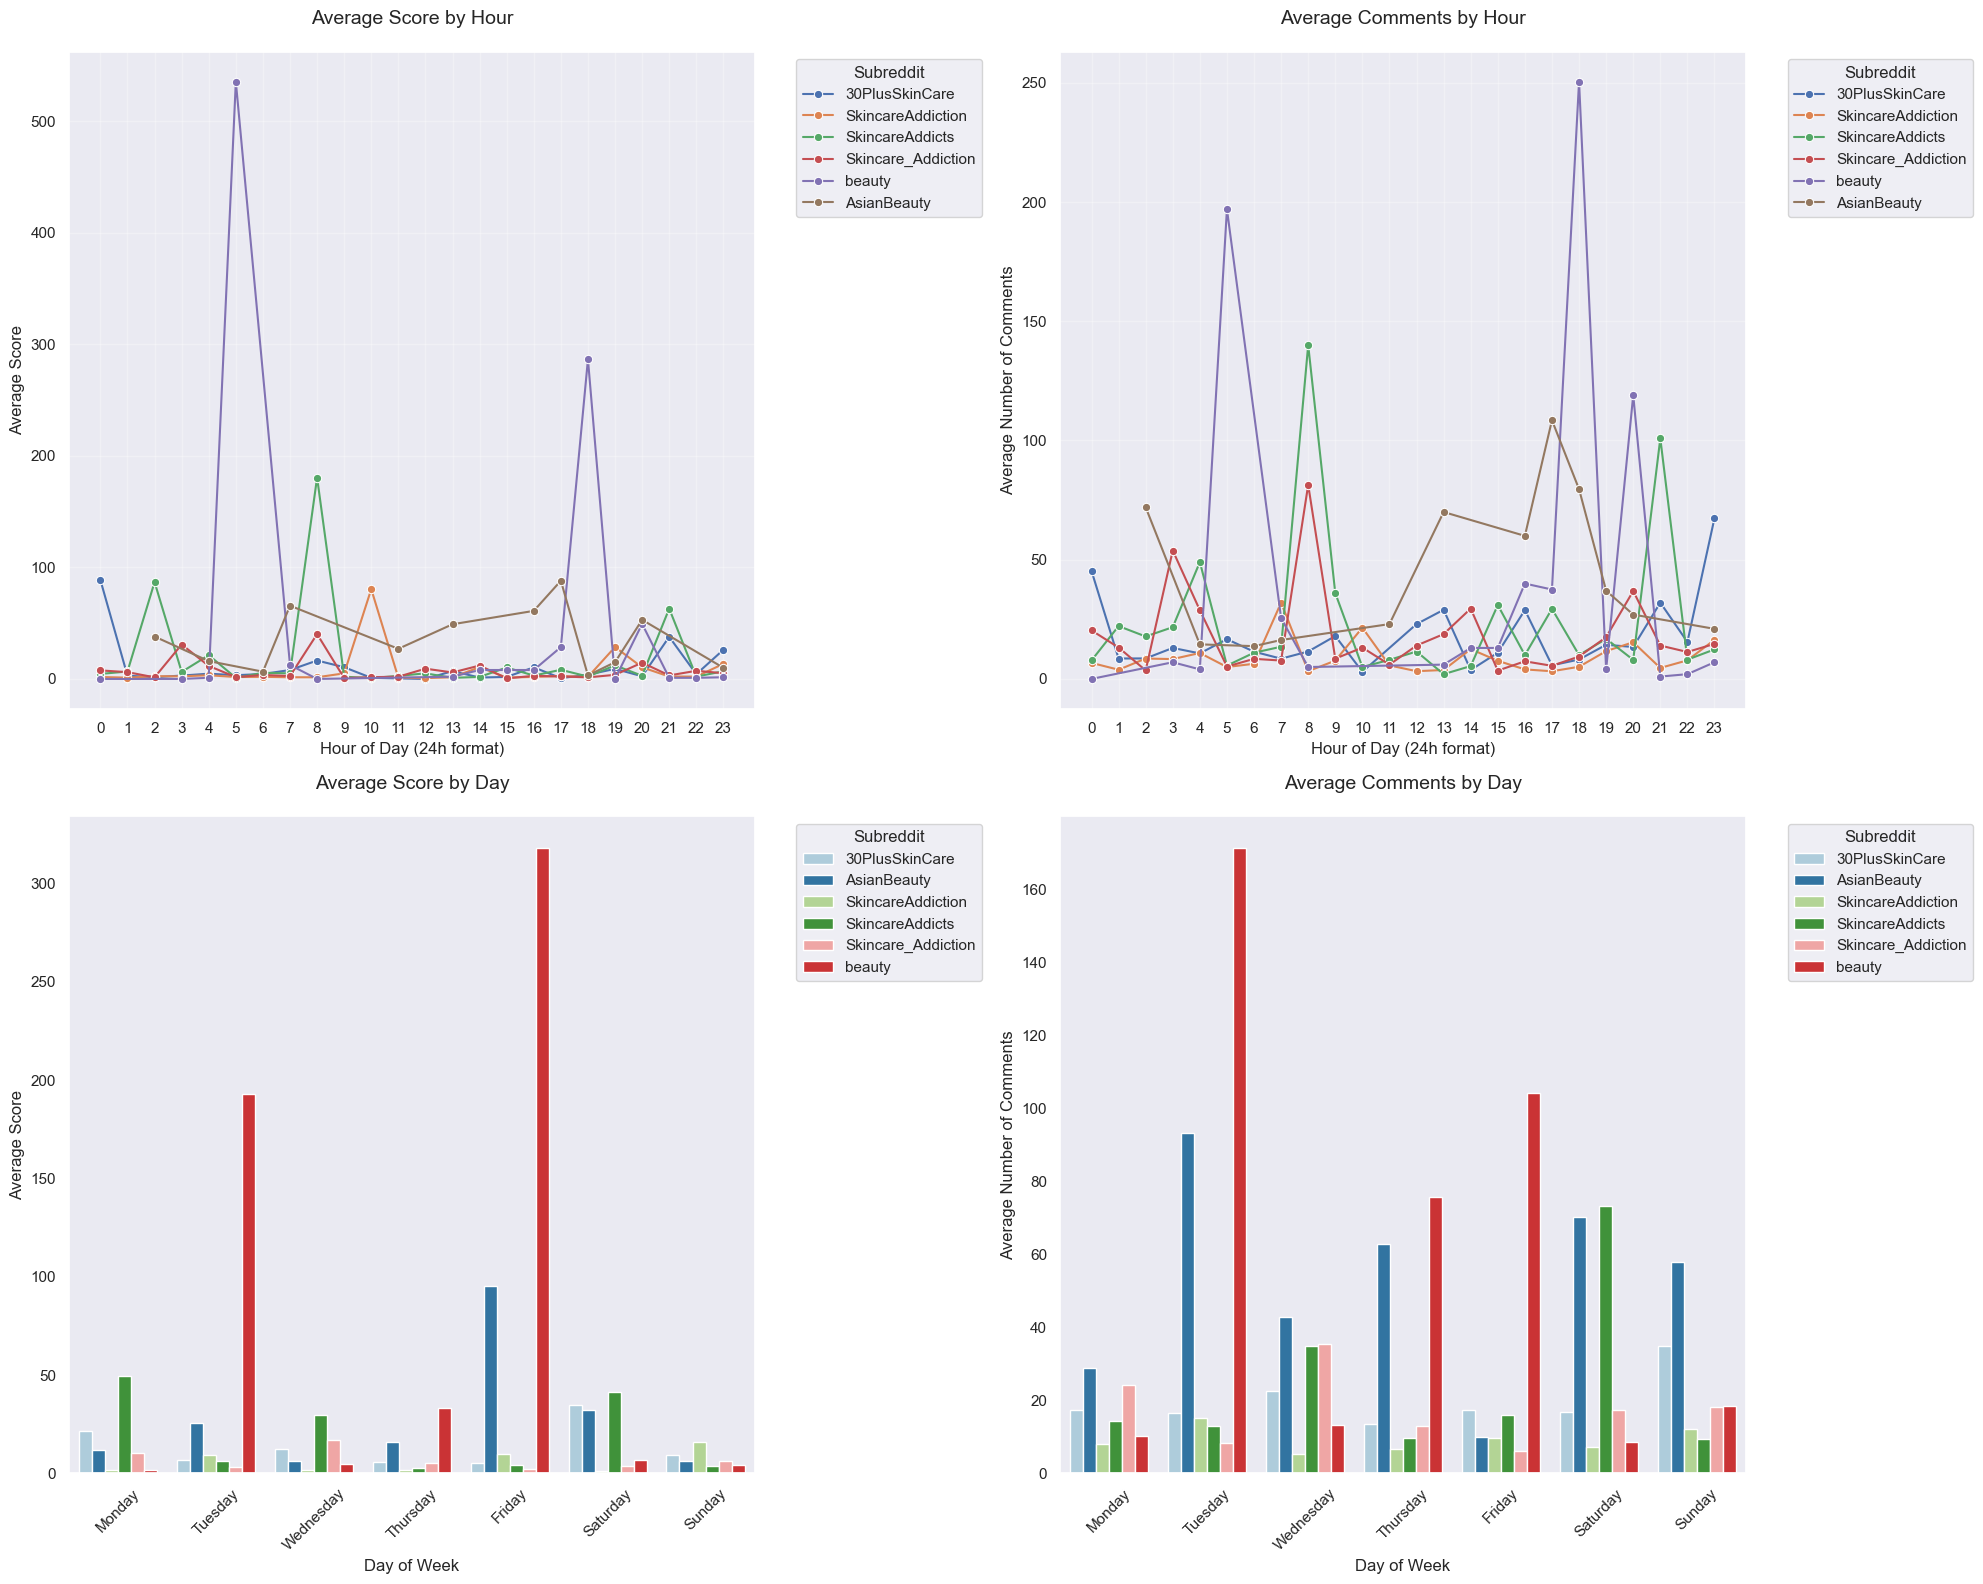

In [122]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Hourly patterns - Scores
sns.lineplot(data=hourly_metrics, x='hour', y='score', 
            hue='subreddit', marker='o', ax=ax1)
ax1.set_title('Average Score by Hour', fontsize=14, pad=20)
ax1.set_xlabel('Hour of Day (24h format)')
ax1.set_ylabel('Average Score')
ax1.set_xticks(range(0, 24))
ax1.grid(True, alpha=0.3)
ax1.legend(title='Subreddit', bbox_to_anchor=(1.05, 1), loc='upper left')

# Hourly patterns - Comments
sns.lineplot(data=hourly_metrics, x='hour', y='num_comments', 
            hue='subreddit', marker='o', ax=ax2)
ax2.set_title('Average Comments by Hour', fontsize=14, pad=20)
ax2.set_xlabel('Hour of Day (24h format)')
ax2.set_ylabel('Average Number of Comments')
ax2.set_xticks(range(0, 24))
ax2.grid(True, alpha=0.3)
ax2.legend(title='Subreddit', bbox_to_anchor=(1.05, 1), loc='upper left')

# Daily patterns - Scores
sns.barplot(data=daily_metrics, x='day_of_week', y='score', 
           hue='subreddit', ax=ax3, order=day_order, palette='Paired')
ax3.set_title('Average Score by Day', fontsize=14, pad=20)
ax3.set_xlabel('Day of Week')
ax3.set_ylabel('Average Score')
ax3.tick_params(axis='x', rotation=45)
ax3.legend(title='Subreddit', bbox_to_anchor=(1.05, 1), loc='upper left')

# Daily patterns - Comments
sns.barplot(data=daily_metrics, x='day_of_week', y='num_comments', 
           hue='subreddit', ax=ax4, order=day_order, palette='Paired')
ax4.set_title('Average Comments by Day', fontsize=14, pad=20)
ax4.set_xlabel('Day of Week')
ax4.set_ylabel('Average Number of Comments')
ax4.tick_params(axis='x', rotation=45)
ax4.legend(title='Subreddit', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

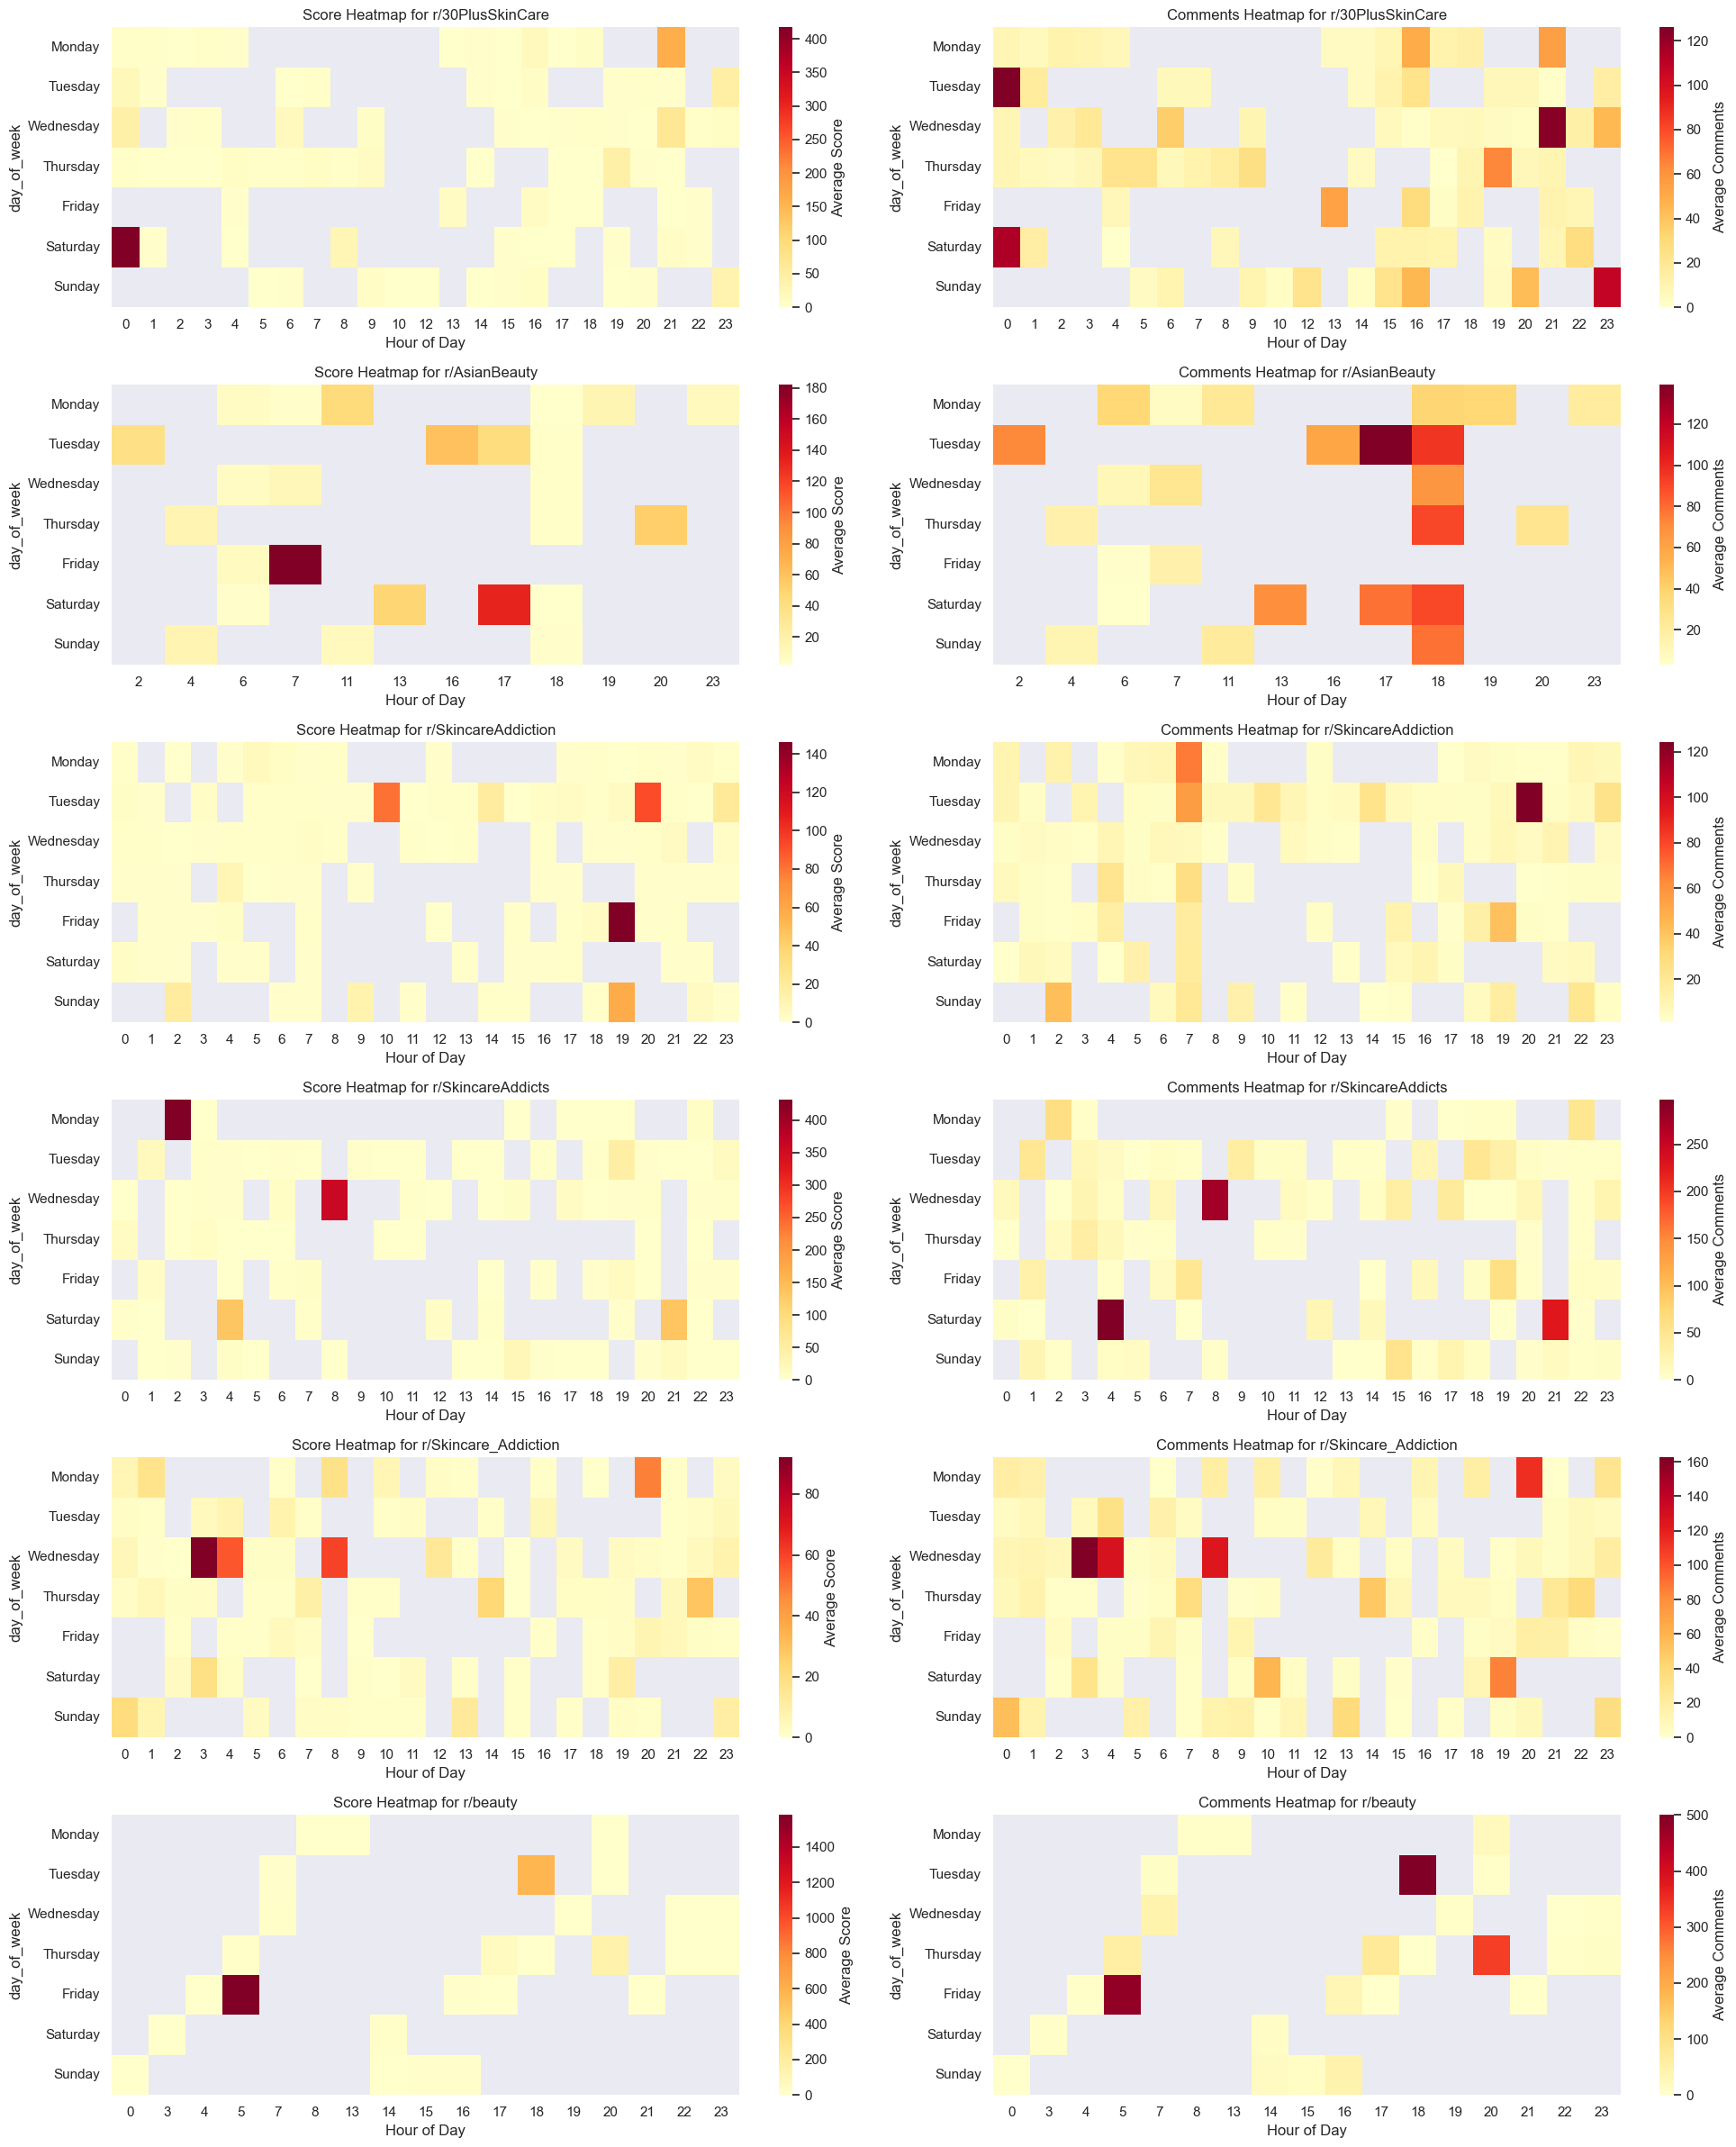

In [71]:
# Create heatmaps for both scores and comments
subreddits = sorted(posts['subreddit'].unique())
fig_heatmap, axs = plt.subplots(len(subreddits), 2, 
                               figsize=(20, 4*len(subreddits)))

# Convert to list if only one subreddit
if len(subreddits) == 1:
    axs = [axs]

for idx, subreddit in enumerate(subreddits):
    subreddit_data = posts[posts['subreddit'] == subreddit]
    
    # Score heatmap
    score_pivot = subreddit_data.pivot_table(
        values='score',
        index='day_of_week',
        columns='hour',
        aggfunc='mean'
    ).reindex(day_order)
    
    sns.heatmap(score_pivot, cmap='YlOrRd', ax=axs[idx][0], 
               cbar_kws={'label': 'Average Score'})
    axs[idx][0].set_title(f'Score Heatmap for r/{subreddit}')
    axs[idx][0].set_xlabel('Hour of Day')
    
    # Comments heatmap
    comments_pivot = subreddit_data.pivot_table(
        values='num_comments',
        index='day_of_week',
        columns='hour',
        aggfunc='mean'
    ).reindex(day_order)
    
    sns.heatmap(comments_pivot, cmap='YlOrRd', ax=axs[idx][1], 
               cbar_kws={'label': 'Average Comments'})
    axs[idx][1].set_title(f'Comments Heatmap for r/{subreddit}')
    axs[idx][1].set_xlabel('Hour of Day')

plt.tight_layout()

In [72]:
# Print insights
print("\nSUBREDDIT ENGAGEMENT INSIGHTS:")
print("-" * 50)

for subreddit in subreddits:
    subreddit_data = posts[posts['subreddit'] == subreddit]
    
    # Calculate best times for scores
    hourly_score_avg = subreddit_data.groupby('hour')['score'].mean()
    daily_score_avg = subreddit_data.groupby('day_of_week')['score'].mean()
    
    # Calculate best times for comments
    hourly_comments_avg = subreddit_data.groupby('hour')['num_comments'].mean()
    daily_comments_avg = subreddit_data.groupby('day_of_week')['num_comments'].mean()
    
    print(f"\nr/{subreddit}:")
    print("\nScore Metrics:")
    print(f"Best hour for scores: {hourly_score_avg.idxmax()}:00 (Avg score: {hourly_score_avg.max():.1f})")
    print(f"Best day for scores: {daily_score_avg.idxmax()} (Avg score: {daily_score_avg.max():.1f})")
    print(f"Overall average score: {subreddit_data['score'].mean():.1f}")
    
    print("\nComment Metrics:")
    print(f"Best hour for comments: {hourly_comments_avg.idxmax()}:00 (Avg comments: {hourly_comments_avg.max():.1f})")
    print(f"Best day for comments: {daily_comments_avg.idxmax()} (Avg comments: {daily_comments_avg.max():.1f})")
    print(f"Overall average comments: {subreddit_data['num_comments'].mean():.1f}")
    print(f"Total posts analyzed: {len(subreddit_data)}")


SUBREDDIT ENGAGEMENT INSIGHTS:
--------------------------------------------------

r/30PlusSkinCare:

Score Metrics:
Best hour for scores: 0:00 (Avg score: 88.7)
Best day for scores: Saturday (Avg score: 34.7)
Overall average score: 13.4

Comment Metrics:
Best hour for comments: 23:00 (Avg comments: 67.4)
Best day for comments: Sunday (Avg comments: 34.9)
Overall average comments: 19.6
Total posts analyzed: 125

r/AsianBeauty:

Score Metrics:
Best hour for scores: 17:00 (Avg score: 88.0)
Best day for scores: Friday (Avg score: 95.5)
Overall average score: 21.2

Comment Metrics:
Best hour for comments: 17:00 (Avg comments: 108.5)
Best day for comments: Tuesday (Avg comments: 93.2)
Overall average comments: 56.6
Total posts analyzed: 36

r/SkincareAddiction:

Score Metrics:
Best hour for scores: 10:00 (Avg score: 80.5)
Best day for scores: Sunday (Avg score: 15.9)
Overall average score: 5.7

Comment Metrics:
Best hour for comments: 7:00 (Avg comments: 32.0)
Best day for comments: Tuesda

In [73]:
# Save plots
fig.savefig('images/engagement_patterns.png', bbox_inches='tight', dpi=300)
fig_heatmap.savefig('images/engagement_heatmaps.png', bbox_inches='tight', dpi=300)

In [110]:
comments = pd.read_csv('data/reddit_CeraVe_comments_20241031_142630.csv')
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136 entries, 0 to 5135
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   post_id        5136 non-null   object
 1   body           5136 non-null   object
 2   score          5136 non-null   int64 
 3   contains_term  5136 non-null   bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 125.5+ KB


In [ ]:
comments.head()

,post_id,body,score,contains_term
0,1gg3ute,"All day, everyday. Sunscreen is the most impor...",86,False
1,1gg3ute,I wear every day on face and arms. Try a k bea...,22,False
2,1gg3ute,everyday. honestly i feel like spf has evolved...,20,False
3,1gg3ute,"Everyday, even if I'm spending the whole day i...",18,False
4,1gg3ute,Every single day. But if I redo my makeup to g...,16,False


In [111]:
comments['contains_term']. value_counts()

contains_term
False    4577
True      559
Name: count, dtype: int64

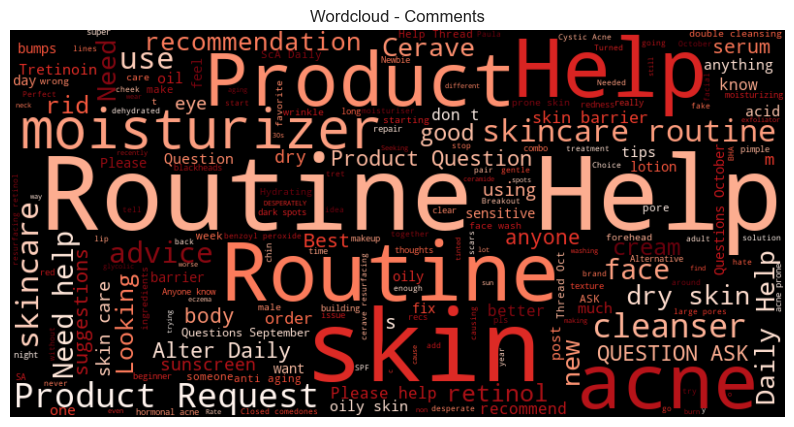

In [ ]:
# Generate world cloud 
comments = ' '.join(posts['body'])
wordcloud1 = WordCloud(width=800, height=400, background_color='Black', colormap='Reds').generate(comments)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title('Wordcloud - Comments')
plt.axis('off');